In [1]:
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [2]:
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('acc') >= 0.96):   
            print("Reached 95% accuracy so cancelling training!")
            self.model.stop_training = True

In [3]:
EPOCHS = 30
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
width=256
height=256
depth=3
train_dir=r"D:\gaurav_sharma\MODEL\dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train"
valid_dir=r"D:\gaurav_sharma\MODEL\dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid"
train_folder=listdir(train_dir)
valid_folder=listdir(valid_dir)

In [4]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [5]:
callbacks = MyCustomCallback()

NameError: name 'MyCustomCallback' is not defined

In [6]:
train_image_list, train_image_label= [], []
for disease_folder in train_folder:
    print(f"processing {disease_folder} ...")
    disease_img_folder= listdir(f"{train_dir}/{disease_folder}")
    #print(disease_img_folder)
    for disease_img in disease_img_folder:
        image_directory = f"{train_dir}/{disease_folder}/{disease_img}"
        if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
            train_image_list.append(convert_image_to_array(image_directory))
            train_image_label.append(disease_folder)
print("[INFO] Image loading completed")

processing Apple___Apple_scab ...
processing Apple___Black_rot ...
processing Apple___Cedar_apple_rust ...
processing Apple___healthy ...
processing Blueberry___healthy ...
processing Cherry_(including_sour)___healthy ...
processing Cherry_(including_sour)___Powdery_mildew ...
processing Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot ...
processing Corn_(maize)___Common_rust_ ...
processing Corn_(maize)___healthy ...
processing Corn_(maize)___Northern_Leaf_Blight ...
processing Grape___Black_rot ...
processing Grape___Esca_(Black_Measles) ...
processing Grape___healthy ...
processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
processing Orange___Haunglongbing_(Citrus_greening) ...
processing Peach___Bacterial_spot ...
processing Peach___healthy ...
processing Pepper,_bell___Bacterial_spot ...
processing Pepper,_bell___healthy ...
processing Potato___Early_blight ...
processing Potato___healthy ...
processing Potato___Late_blight ...
processing Raspberry___healthy ...
processing

In [7]:
print(len(train_image_list))

70295


In [8]:
valid_image_list, valid_image_label= [], []
for disease_folder in valid_folder:
    print(f"processing {disease_folder} ...")
    disease_img_folder= listdir(f"{valid_dir}/{disease_folder}")

    for disease_img in disease_img_folder:
        image_directory = f"{valid_dir}/{disease_folder}/{disease_img}"
        if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
            valid_image_list.append(convert_image_to_array(image_directory))
            valid_image_label.append(disease_folder)
print("[INFO] Image loading completed")

processing Apple___Apple_scab ...
processing Apple___Black_rot ...
processing Apple___Cedar_apple_rust ...
processing Apple___healthy ...
processing Blueberry___healthy ...
processing Cherry_(including_sour)___healthy ...
processing Cherry_(including_sour)___Powdery_mildew ...
processing Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot ...
processing Corn_(maize)___Common_rust_ ...
processing Corn_(maize)___healthy ...
processing Corn_(maize)___Northern_Leaf_Blight ...
processing Grape___Black_rot ...
processing Grape___Esca_(Black_Measles) ...
processing Grape___healthy ...
processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
processing Orange___Haunglongbing_(Citrus_greening) ...
processing Peach___Bacterial_spot ...
processing Peach___healthy ...
processing Pepper,_bell___Bacterial_spot ...
processing Pepper,_bell___healthy ...
processing Potato___Early_blight ...
processing Potato___healthy ...
processing Potato___Late_blight ...
processing Raspberry___healthy ...
processing

In [9]:
print(len(valid_image_label))

17572


In [10]:
label_binarizer = LabelBinarizer()
bin_train_image_labels = label_binarizer.fit_transform(train_image_label)
bin_valid_image_labels = label_binarizer.fit_transform(valid_image_label)
pickle.dump(label_binarizer,open('Label_Instance.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [11]:
print(n_classes)

38


In [12]:
np_train_image_list = np.array(train_image_list, dtype=np.float16) / 255.0
np_valid_image_list = np.array(valid_image_list, dtype=np.float16) / 255.0

In [13]:
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model=Sequential([
                  Conv2D(32,(3,3),padding="same",input_shape=inputShape,activation="relu"),
                  BatchNormalization(axis=chanDim),
                  MaxPooling2D(pool_size=(3,3)),
                  Dropout(0.25),

                  Conv2D(64,(3,3),padding="same",activation="relu"),      
                  BatchNormalization(axis=chanDim),
                  MaxPooling2D(pool_size=(3,3)),

                  Conv2D(64,(3,3),padding="same",activation="relu"),      
                  BatchNormalization(axis=chanDim),
                  MaxPooling2D(pool_size=(3,3)),
                  Dropout(0.25),

                  Conv2D(128,(3,3),padding="same",activation="relu"),      
                  BatchNormalization(axis=chanDim),
                  MaxPooling2D(pool_size=(3,3)),

                  Conv2D(128,(3,3),padding="same",activation="relu"),      
                  BatchNormalization(axis=chanDim),
                  MaxPooling2D(pool_size=(3,3)),
                  Dropout(0.25),

                  Flatten(),
                  Dense(1024, activation="relu"),
                  BatchNormalization(),
                  Dropout(0.5),

                  Dense(n_classes,activation="softmax")

])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 85, 85, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0

In [15]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution

strategy  = tf.distribute.experimental.MultiWorkerMirroredStrategy()

with strategy.scope():
    inputShape = (height, width, depth)
    chanDim = -1
    if K.image_data_format() == "channels_first":
        inputShape = (depth, height, width)
        chanDim = 1
    model=Sequential([
                      Conv2D(32,(3,3),padding="same",input_shape=inputShape,activation="relu"),
                      BatchNormalization(axis=chanDim),
                      MaxPooling2D(pool_size=(3,3)),
                      Dropout(0.25),

                      Conv2D(64,(3,3),padding="same",activation="relu"),      
                      BatchNormalization(axis=chanDim),
                      MaxPooling2D(pool_size=(3,3)),

                      Conv2D(64,(3,3),padding="same",activation="relu"),      
                      BatchNormalization(axis=chanDim),
                      MaxPooling2D(pool_size=(3,3)),
                      Dropout(0.25),

                      Conv2D(128,(3,3),padding="same",activation="relu"),      
                      BatchNormalization(axis=chanDim),
                      MaxPooling2D(pool_size=(3,3)),

                      Conv2D(128,(3,3),padding="same",activation="relu"),      
                      BatchNormalization(axis=chanDim),
                      MaxPooling2D(pool_size=(3,3)),
                      Dropout(0.25),

                      Flatten(),
                      Dense(1024, activation="relu"),
                      BatchNormalization(),
                      Dropout(0.5),

                      Dense(n_classes,activation="softmax")

    ])
    model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

print("[INFO] training network...")

INFO:tensorflow:Single-worker CollectiveAllReduceStrategy with local_devices = ('/device:GPU:0', '/device:GPU:1'), communication = CollectiveCommunication.AUTO
INFO:tensorflow:Collective batch_all_reduce: 1 all-reduces, num_workers = 1
INFO:tensorflow:Collective batch_all_reduce: 1 all-reduces, num_workers = 1
INFO:tensorflow:Collective batch_all_reduce: 1 all-reduces, num_workers = 1
INFO:tensorflow:Collective batch_all_reduce: 1 all-reduces, num_workers = 1
INFO:tensorflow:Collective batch_all_reduce: 1 all-reduces, num_workers = 1
INFO:tensorflow:Collective batch_all_reduce: 1 all-reduces, num_workers = 1
INFO:tensorflow:Collective batch_all_reduce: 1 all-reduces, num_workers = 1
INFO:tensorflow:Collective batch_all_reduce: 1 all-reduces, num_workers = 1
INFO:tensorflow:Collective batch_all_reduce: 1 all-reduces, num_workers = 1
INFO:tensorflow:Collective batch_all_reduce: 1 all-reduces, num_workers = 1
[INFO] training network...


In [16]:
history=model.fit(np_train_image_list,bin_train_image_labels,
                  validation_data=(np_valid_image_list, bin_valid_image_labels),
                  batch_size=BS,
                  epochs=EPOCHS, verbose=1        
                  )

Train on 70295 samples, validate on 17572 samples
Epoch 1/30
INFO:tensorflow:Collective batch_all_reduce: 26 all-reduces, num_workers = 1
INFO:tensorflow:Collective batch_all_reduce: 26 all-reduces, num_workers = 1
70295/70295 [==============================] - 152s 2ms/sample - loss: 1.5093 - accuracy: 0.5682 - val_loss: 0.8185 - val_accuracy: 0.7469
Epoch 2/30
70295/70295 [==============================] - 116s 2ms/sample - loss: 0.6487 - accuracy: 0.7967 - val_loss: 0.7741 - val_accuracy: 0.8600
Epoch 3/30
70295/70295 [==============================] - 117s 2ms/sample - loss: 0.4555 - accuracy: 0.8560 - val_loss: 0.3253 - val_accuracy: 0.8932
Epoch 4/30
70295/70295 [==============================] - 116s 2ms/sample - loss: 0.3537 - accuracy: 0.8866 - val_loss: 0.2744 - val_accuracy: 0.9063
Epoch 5/30
70295/70295 [==============================] - 116s 2ms/sample - loss: 0.2894 - accuracy: 0.9067 - val_loss: 0.1689 - val_accuracy: 0.9431
Epoch 6/30
70295/70295 [======================

In [17]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(np_valid_image_list, bin_valid_image_labels)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
17572/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy: 97.80332446098328


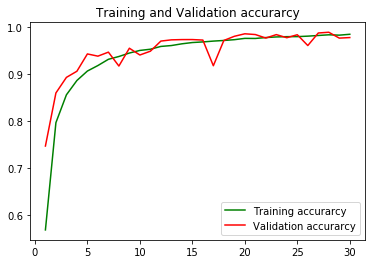

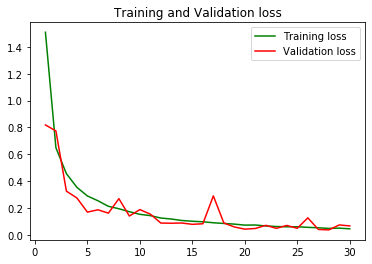

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'g', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [27]:
model.save("model.h5")